# Reference trajectories from force plate data

## 1) Workspace preparation

In [1]:
import importlib
import os
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import LocomotionAnalysisTools as lat

In [5]:
# Reload import if modified (jupyter notebook caches imports by default)
importlib.reload(lat)

<module 'LocomotionAnalysisTools' from 'C:\\Users\\robaeten\\OneDrive - UGent\\Documenten\\Werk\\python\\GMC_GPR_GDA\\LocomotionAnalysisTools.py'>

### 2) Data preparation

In [3]:
# Define where to get the data
dataFolder = "C:/Users/robaeten/OneDrive - UGent/Gait Classification and References/Data"

subjectSessions = {"Subject1": ["Session4"], "Subject2": ["Session1"], "Subject3": ["Session1"], "Subject4": ["Session1"],
                   "Subject5": ["Session1"], "Subject6": ["Session1"], "Subject7": ["Session1"], "Subject8": ["Session1"], 
                   "Subject9": ["Session1"], "Subject10": ["Session1"], "Subject11": ["Session1"], "Subject12": ["Session1"], 
                   "Subject13": ["Session1"], "Subject14": ["Session1"], "Subject15": ["Session1"], "Subject16": ["Session1"], 
                   "Subject17": ["Session1"], "Subject18": ["Session1"], "Subject19": ["Session1"], "Subject20": ["Session1"]}
# subjectSessions = {"Subject1": ["Session4"]}
# subjectSessions = {"Subject2": ["Session1"]}
# subjectSessions = {"Subject3": ["Session1"]}
# subjectSessions = {"Subject4": ["Session1"]}
# subjectSessions = {"Subject5": ["Session1"]}
# subjectSessions = {"Subject6": ["Session1"]}
# subjectSessions = {"Subject7": ["Session1"]}
# subjectSessions = {"Subject8": ["Session1"]}
# subjectSessions = {"Subject9": ["Session1"]}
# subjectSessions = {"Subject10": ["Session1"]}
# subjectSessions = {"Subject11": ["Session1"]}
# subjectSessions = {"Subject12": ["Session1"]}
# subjectSessions = {"Subject13": ["Session1"]}
# subjectSessions = {"Subject14": ["Session1"]}
# subjectSessions = {"Subject15": ["Session1"]}
# subjectSessions = {"Subject16": ["Session1"]}
# subjectSessions = {"Subject17": ["Session1"]}
# subjectSessions = {"Subject18": ["Session1"]}
# subjectSessions = {"Subject19": ["Session1"]}
# subjectSessions = {"Subject20": ["Session1"]}

dataToRead = "_Proc_Ref"
foldersToRead, subjectInfoFiles = lat.get_data_locations(dataFolder, subjectSessions, dataToRead)

In [88]:
# Construct the EMG norms
# lat.get_emg_norms(foldersToRead)

In [89]:
# Construct the EMG features
# lat.create_emg_feat_files(foldersToRead, f_emg=1000, f_markers=100, window=0.3, norm="cycle")

In [90]:
# Construct the IMU features
# lat.create_imu_feat_files(foldersToRead, f_markers=100, seq="XYZ")

In [91]:
# Construct the GON features
# lat.create_gon_feat_files(foldersToRead, f_markers=100)

In [4]:
# Get list of tuples with every file to read and its corresponding activity, as well as a list with corresponding subject information
filesToRead, subjectInfo = lat.get_filenames_ref(foldersToRead, subjectInfoFiles)

# Define which leg is instrumented with EMG
instrumented_leg = "right"

### 3) Calculate and store reference data

In [6]:
# Initialize object to store processed data in
processed_data = lat.ProcessedData(foldersToRead)

# Calculate the means
processed_data.update_means_sds(filesToRead, instrumented_leg)
meanDict = processed_data.meanDict
sdsDict = processed_data.sdsDict
skwDict = processed_data.skwDict
cntDict = processed_data.counterDict

C:\Users\robaeten\OneDrive - UGent\Documenten\Werk\python\GMC_GPR_GDA\LocomotionAnalysisTools.py:279: RuntimeWarning: Mean of empty slice
  arrModelOutputs = np.nanmean(arrModelOutputs, axis=0)
C:\Users\robaeten\OneDrive - UGent\Documenten\Werk\python\GMC_GPR_GDA\LocomotionAnalysisTools.py:279: RuntimeWarning: Mean of empty slice
  arrModelOutputs = np.nanmean(arrModelOutputs, axis=0)
C:\Users\robaeten\OneDrive - UGent\Documenten\Werk\python\GMC_GPR_GDA\LocomotionAnalysisTools.py:279: RuntimeWarning: Mean of empty slice
  arrModelOutputs = np.nanmean(arrModelOutputs, axis=0)
C:\Users\robaeten\OneDrive - UGent\Documenten\Werk\python\GMC_GPR_GDA\LocomotionAnalysisTools.py:279: RuntimeWarning: Mean of empty slice
  arrModelOutputs = np.nanmean(arrModelOutputs, axis=0)
C:\Users\robaeten\OneDrive - UGent\Documenten\Werk\python\GMC_GPR_GDA\LocomotionAnalysisTools.py:279: RuntimeWarning: Mean of empty slice
  arrModelOutputs = np.nanmean(arrModelOutputs, axis=0)
C:\Users\robaeten\OneDrive - U

### 4) Visualize results

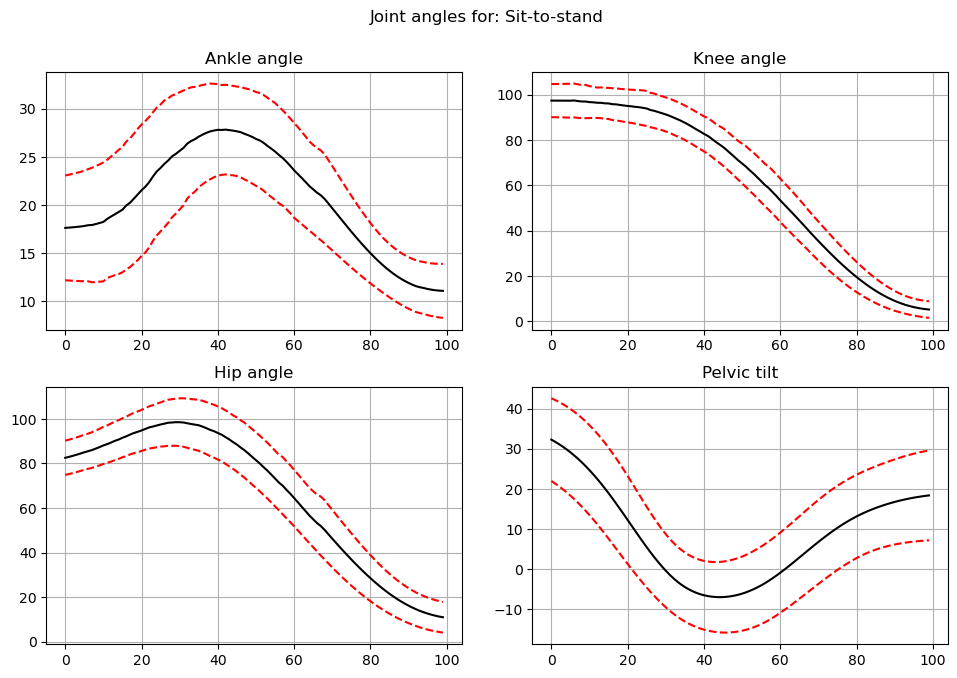

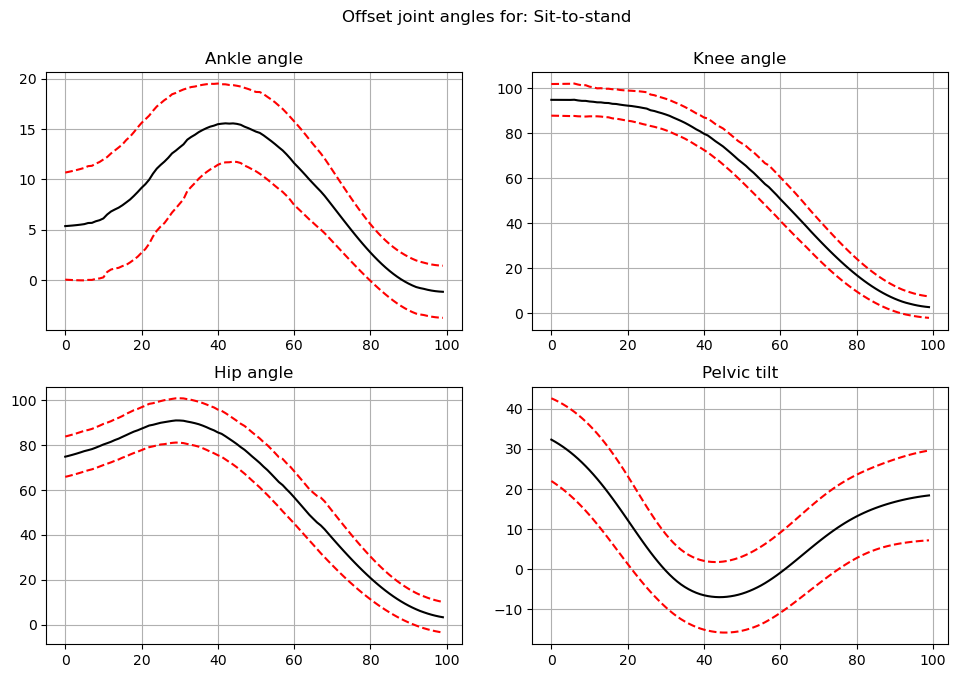

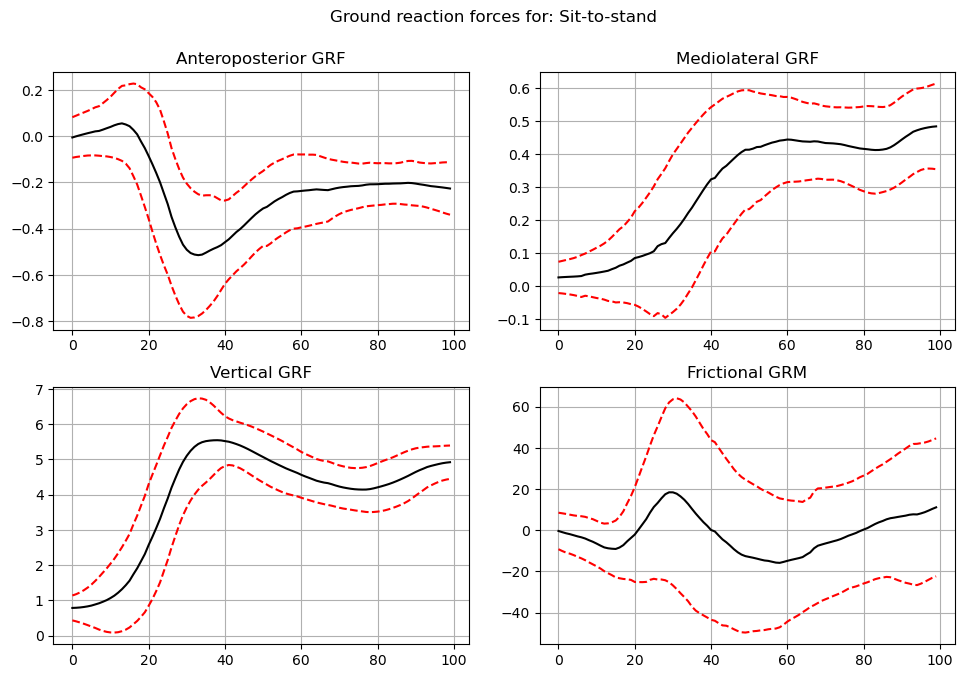

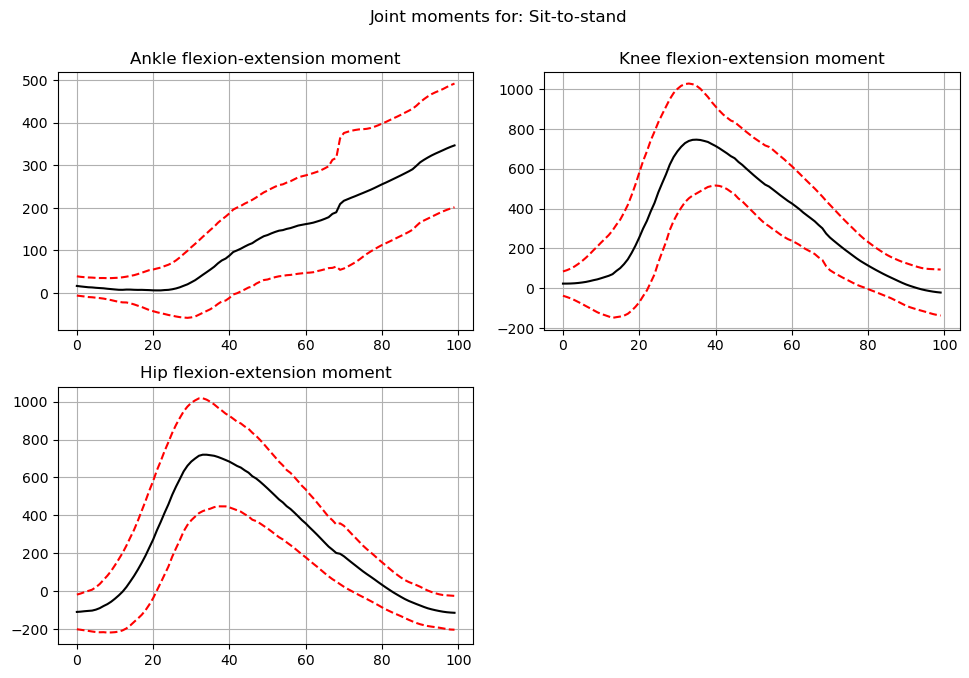

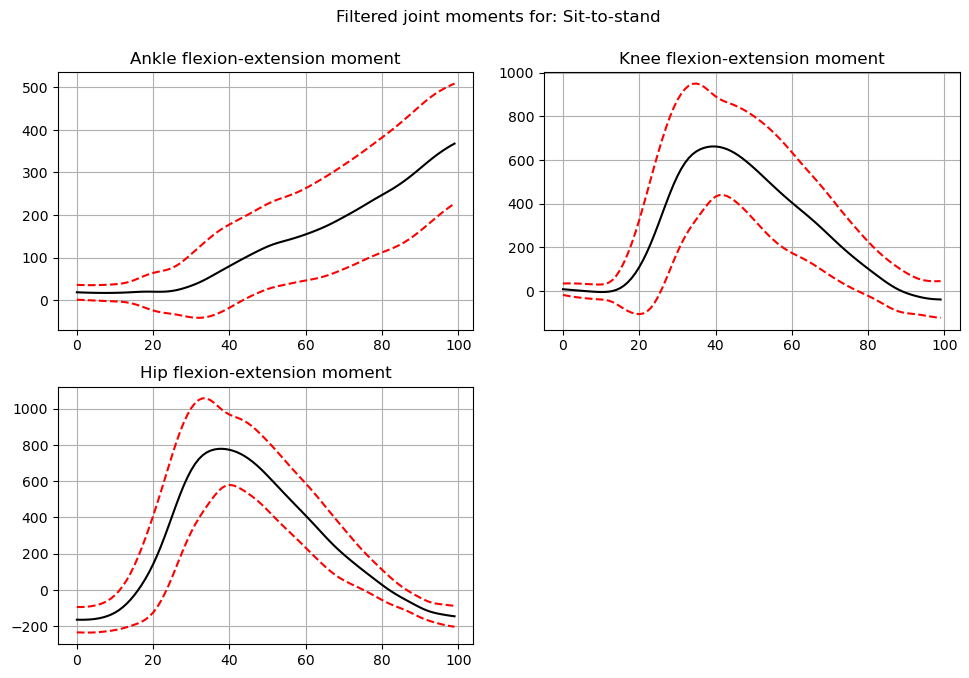

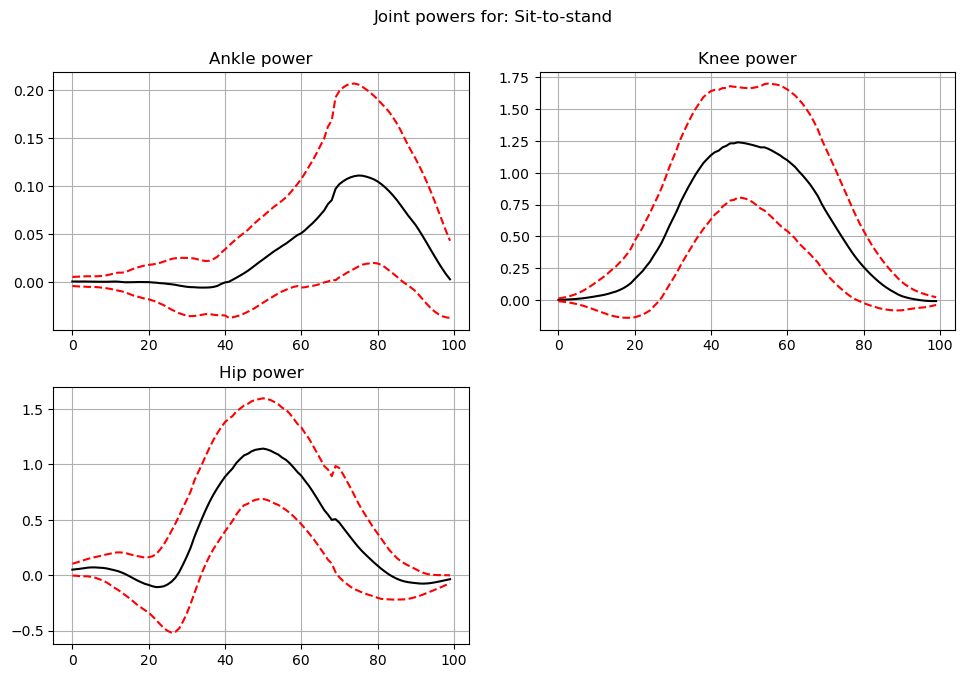

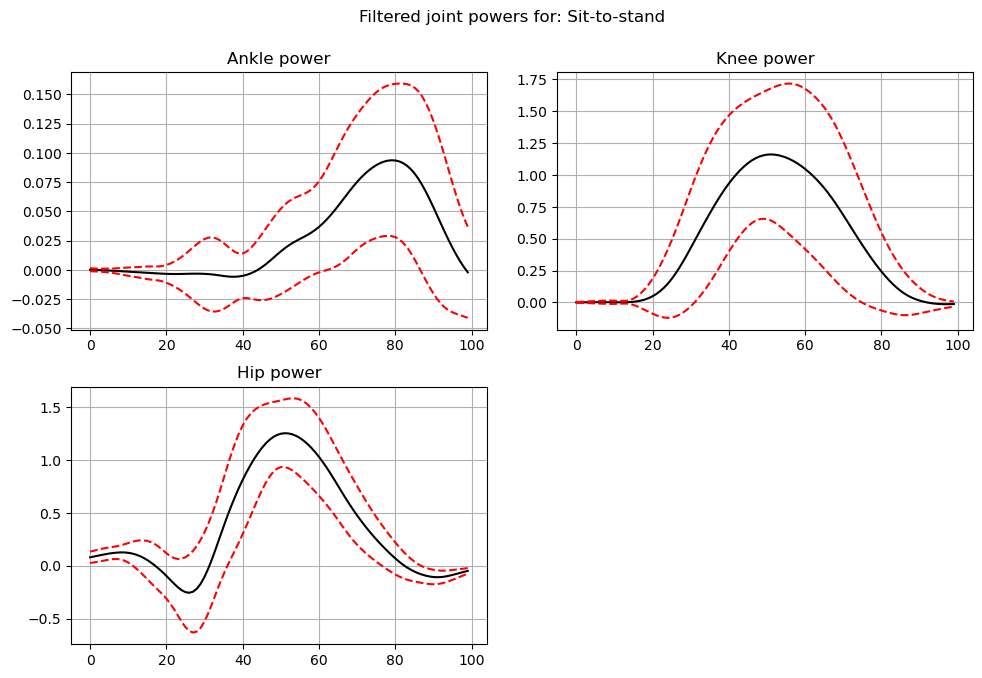

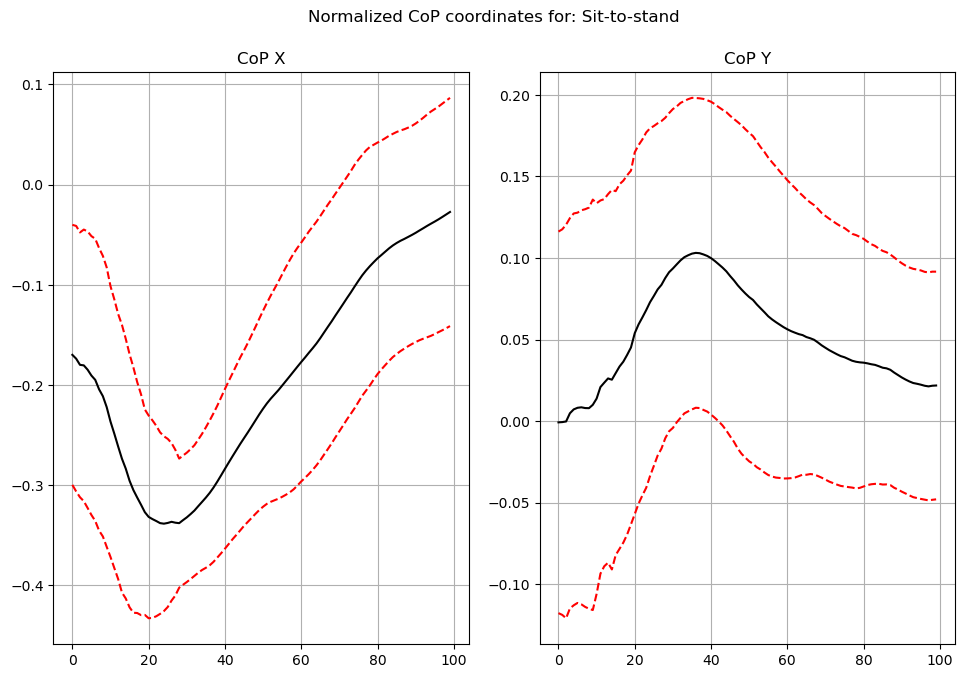

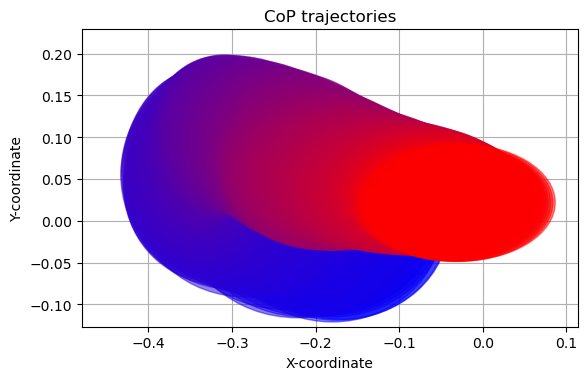

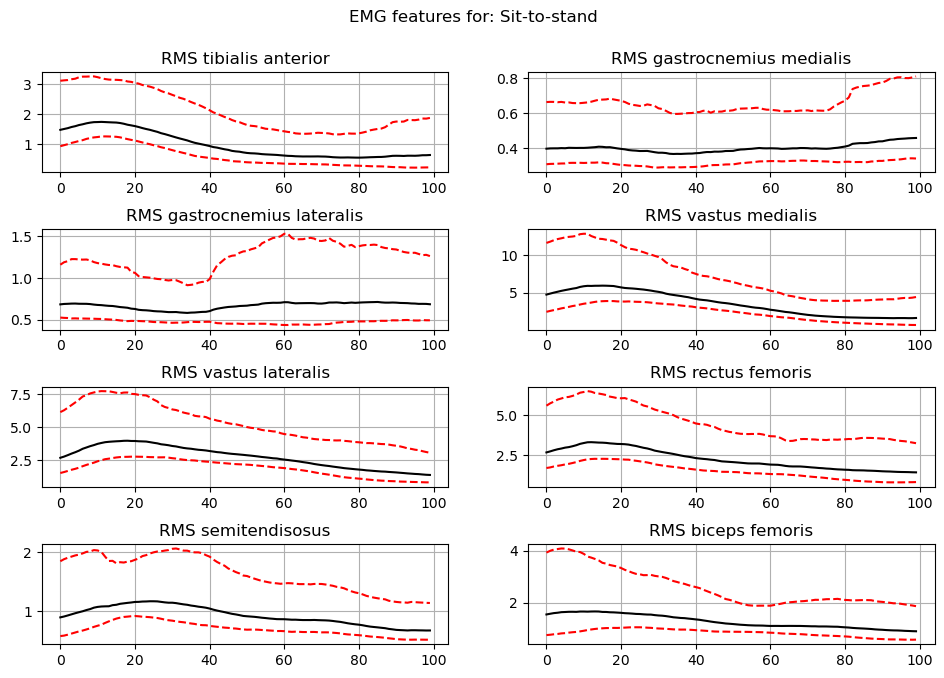

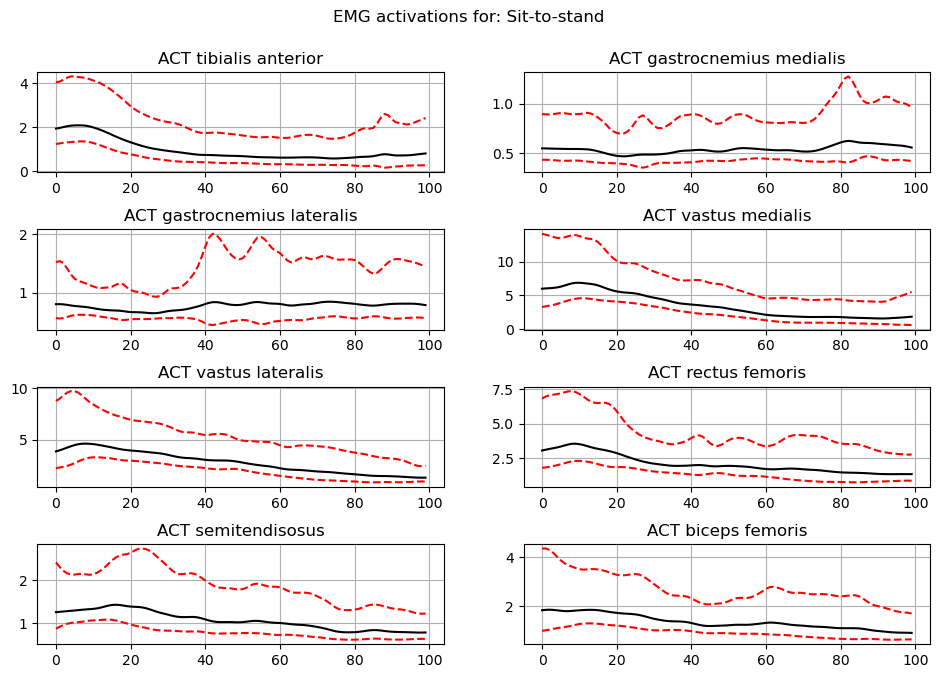

In [7]:
# Choose activity to visualize

# activity = "Slow level walking"
# activity = "Normal level walking"
# activity = "Fast level walking"
# activity = "Walking backwards"
# activity = "Jogging"
# activity = "Circular walking (inner leg)"
# activity = "Circular walking (outer leg)"
# activity = "Side stepping (leading leg)"
# activity = "Side stepping (following leg)"
# activity = "Ramp ascent (10deg)"
# activity = "Ramp descent (10deg)"
# activity = "Stair ascent (SOS)"
# activity = "Stair descent (SOS)"
# activity = "Stair ascent (SBS)(leading leg)"
# activity = "Stair descent (SBS)(leading leg)"
# activity = "Stair ascent (SBS)(following leg)"
# activity = "Stair descent (SBS)(following leg)"
# activity = "Standing"
# activity = "Sitting"
activity = "Sit-to-stand"
# activity = "Stand-to-sit"
# activity = "Calf raise up"
# activity = "Calf raise down"
# activity = "Squat up"
# activity = "Squat down"

%matplotlib inline

# Visualize joint angles
ankleAngle = meanDict[activity]["AnkleAnglesX"].to_numpy()
kneeAngle = meanDict[activity]["KneeAnglesX"].to_numpy()
hipAngle = meanDict[activity]["HipAnglesX"].to_numpy()
pelvisAngle = meanDict[activity]["PelvicTilt"].to_numpy()

ankleAngleSds = sdsDict[activity]["AnkleAnglesX"].to_numpy()
kneeAngleSds = sdsDict[activity]["KneeAnglesX"].to_numpy()
hipAngleSds = sdsDict[activity]["HipAnglesX"].to_numpy()
pelvisAngleSds = sdsDict[activity]["PelvicTilt"].to_numpy()

title = "Joint angles for: " + activity
features_plot = [(ankleAngle, ankleAngleSds), (kneeAngle, kneeAngleSds), (hipAngle, hipAngleSds), (pelvisAngle, pelvisAngleSds)]
labels = ["Ankle angle", "Knee angle", "Hip angle", "Pelvic tilt"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize offset joint angles
ankleAngle = meanDict[activity]["AnkleAnglesX_offset"].to_numpy()
kneeAngle = meanDict[activity]["KneeAnglesX_offset"].to_numpy()
hipAngle = meanDict[activity]["HipAnglesX_offset"].to_numpy()
pelvisAngle = meanDict[activity]["PelvicTilt"].to_numpy()

ankleAngleSds = sdsDict[activity]["AnkleAnglesX_offset"].to_numpy()
kneeAngleSds = sdsDict[activity]["KneeAnglesX_offset"].to_numpy()
hipAngleSds = sdsDict[activity]["HipAnglesX_offset"].to_numpy()
pelvisAngleSds = sdsDict[activity]["PelvicTilt"].to_numpy()

title = "Offset joint angles for: " + activity
features_plot = [(ankleAngle, ankleAngleSds), (kneeAngle, kneeAngleSds), (hipAngle, hipAngleSds), (pelvisAngle, pelvisAngleSds)]
labels = ["Ankle angle", "Knee angle", "Hip angle", "Pelvic tilt"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize GRF
GRFX = meanDict[activity]["GroundReactionForceX"].to_numpy()
GRFY = meanDict[activity]["GroundReactionForceY"].to_numpy()
GRFZ = meanDict[activity]["GroundReactionForceZ"].to_numpy()
GRMZ = meanDict[activity]["GroundReactionMomentZ"].to_numpy()

GRFXSds = sdsDict[activity]["GroundReactionForceX"].to_numpy()
GRFYSds = sdsDict[activity]["GroundReactionForceY"].to_numpy()
GRFZSds = sdsDict[activity]["GroundReactionForceZ"].to_numpy()
GRMZSds = sdsDict[activity]["GroundReactionMomentZ"].to_numpy()

title = "Ground reaction forces for: " + activity
features_plot = [(GRFX, GRFXSds), (GRFY, GRFYSds), (GRFZ, GRFZSds), (GRMZ, GRMZSds)]
labels = ["Anteroposterior GRF", "Mediolateral GRF", "Vertical GRF", "Frictional GRM"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize joint moments
ankleMoment = meanDict[activity]["AnkleMomentX"].to_numpy()
kneeMoment = meanDict[activity]["KneeMomentX"].to_numpy()
hipMoment = meanDict[activity]["HipMomentX"].to_numpy()

ankleMomentSds = sdsDict[activity]["AnkleMomentX"].to_numpy()
kneeMomentSds = sdsDict[activity]["KneeMomentX"].to_numpy()
hipMomentSds = sdsDict[activity]["HipMomentX"].to_numpy()

title = "Joint moments for: " + activity
features_plot = [(ankleMoment, ankleMomentSds), (kneeMoment, kneeMomentSds), (hipMoment, hipMomentSds)]
labels = ["Ankle flexion-extension moment", "Knee flexion-extension moment", "Hip flexion-extension moment"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize filtered joint moments
ankleMoment = meanDict[activity]["AnkleMomentX_filt"].to_numpy()
kneeMoment = meanDict[activity]["KneeMomentX_filt"].to_numpy()
hipMoment = meanDict[activity]["HipMomentX_filt"].to_numpy()

ankleMomentSds = sdsDict[activity]["AnkleMomentX_filt"].to_numpy()
kneeMomentSds = sdsDict[activity]["KneeMomentX_filt"].to_numpy()
hipMomentSds = sdsDict[activity]["HipMomentX_filt"].to_numpy()

title = "Filtered joint moments for: " + activity
features_plot = [(ankleMoment, ankleMomentSds), (kneeMoment, kneeMomentSds), (hipMoment, hipMomentSds)]
labels = ["Ankle flexion-extension moment", "Knee flexion-extension moment", "Hip flexion-extension moment"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize joint powers
anklePower = meanDict[activity]["AnklePowerZ"].to_numpy()
kneePower = meanDict[activity]["KneePowerZ"].to_numpy()
hipPower = meanDict[activity]["HipPowerZ"].to_numpy()

anklePowerSds = sdsDict[activity]["AnklePowerZ"].to_numpy()
kneePowerSds = sdsDict[activity]["KneePowerZ"].to_numpy()
hipPowerSds = sdsDict[activity]["HipPowerZ"].to_numpy()

title = "Joint powers for: " + activity
features_plot = [(anklePower, anklePowerSds), (kneePower, kneePowerSds), (hipPower, hipPowerSds)]
labels = ["Ankle power", "Knee power", "Hip power"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize filtered joint powers
anklePower = meanDict[activity]["AnklePowerZ_filt"].to_numpy()
kneePower = meanDict[activity]["KneePowerZ_filt"].to_numpy()
hipPower = meanDict[activity]["HipPowerZ_filt"].to_numpy()

anklePowerSds = sdsDict[activity]["AnklePowerZ_filt"].to_numpy()
kneePowerSds = sdsDict[activity]["KneePowerZ_filt"].to_numpy()
hipPowerSds = sdsDict[activity]["HipPowerZ_filt"].to_numpy()

title = "Filtered joint powers for: " + activity
features_plot = [(anklePower, anklePowerSds), (kneePower, kneePowerSds), (hipPower, hipPowerSds)]
labels = ["Ankle power", "Knee power", "Hip power"]
lat.visualize_features(features_plot, title=title, labels=labels)


# Visualize COP
COPX = meanDict[activity]["COPX"].to_numpy()
COPY = meanDict[activity]["COPY"].to_numpy()

COPXSds = sdsDict[activity]["COPX"].to_numpy()
COPYSds = sdsDict[activity]["COPY"].to_numpy()

title = "Normalized CoP coordinates for: " + activity
features_plot = [(COPX, COPXSds), (COPY, COPYSds)]
labels = ["CoP X", "CoP Y"]
lat.visualize_features(features_plot, title=title, labels=labels)
lat.visualize_cop_traj(COPX, COPY, COPXSds, COPYSds)


# Visualize some EMG features
RMS_TA = meanDict[activity]["RMS TA"].to_numpy()
RMS_GM = meanDict[activity]["RMS GM"].to_numpy()
RMS_GL = meanDict[activity]["RMS GL"].to_numpy()
RMS_VM = meanDict[activity]["RMS VM"].to_numpy()
RMS_VL = meanDict[activity]["RMS VL"].to_numpy()
RMS_RF = meanDict[activity]["RMS RF"].to_numpy()
RMS_ST = meanDict[activity]["RMS ST"].to_numpy()
RMS_BF = meanDict[activity]["RMS BF"].to_numpy()

RMS_TASds = sdsDict[activity]["RMS TA"].to_numpy()
RMS_GMSds = sdsDict[activity]["RMS GM"].to_numpy()
RMS_GLSds = sdsDict[activity]["RMS GL"].to_numpy()
RMS_VMSds = sdsDict[activity]["RMS VM"].to_numpy()
RMS_VLSds = sdsDict[activity]["RMS VL"].to_numpy()
RMS_RFSds = sdsDict[activity]["RMS RF"].to_numpy()
RMS_STSds = sdsDict[activity]["RMS ST"].to_numpy()
RMS_BFSds = sdsDict[activity]["RMS BF"].to_numpy()

title = "EMG features for: " + activity
features_plot = [(RMS_TA, RMS_TASds), (RMS_GM, RMS_GMSds), (RMS_GL, RMS_GLSds), (RMS_VM, RMS_VMSds), 
                 (RMS_VL, RMS_VLSds), (RMS_RF, RMS_RFSds), (RMS_ST, RMS_STSds), (RMS_BF, RMS_BFSds)]
labels = ["RMS tibialis anterior", "RMS gastrocnemius medialis", "RMS gastrocnemius lateralis", "RMS vastus medialis",
          "RMS vastus lateralis", "RMS rectus femoris", "RMS semitendisosus", "RMS biceps femoris"]
lat.visualize_features(features_plot, title=title, labels=labels, emg=True)


# Visualize some EMG activations
ACT_TA = meanDict[activity]["ACT TA"].to_numpy()
ACT_GM = meanDict[activity]["ACT GM"].to_numpy()
ACT_GL = meanDict[activity]["ACT GL"].to_numpy()
ACT_VM = meanDict[activity]["ACT VM"].to_numpy()
ACT_VL = meanDict[activity]["ACT VL"].to_numpy()
ACT_RF = meanDict[activity]["ACT RF"].to_numpy()
ACT_ST = meanDict[activity]["ACT ST"].to_numpy()
ACT_BF = meanDict[activity]["ACT BF"].to_numpy()

ACT_TASds = sdsDict[activity]["ACT TA"].to_numpy()
ACT_GMSds = sdsDict[activity]["ACT GM"].to_numpy()
ACT_GLSds = sdsDict[activity]["ACT GL"].to_numpy()
ACT_VMSds = sdsDict[activity]["ACT VM"].to_numpy()
ACT_VLSds = sdsDict[activity]["ACT VL"].to_numpy()
ACT_RFSds = sdsDict[activity]["ACT RF"].to_numpy()
ACT_STSds = sdsDict[activity]["ACT ST"].to_numpy()
ACT_BFSds = sdsDict[activity]["ACT BF"].to_numpy()

title = "EMG activations for: " + activity
features_plot = [(ACT_TA, ACT_TASds), (ACT_GM, ACT_GMSds), (ACT_GL, ACT_GLSds), (ACT_VM, ACT_VMSds), 
                 (ACT_VL, ACT_VLSds), (ACT_RF, ACT_RFSds), (ACT_ST, ACT_STSds), (ACT_BF, ACT_BFSds)]
labels = ["ACT tibialis anterior", "ACT gastrocnemius medialis", "ACT gastrocnemius lateralis", "ACT vastus medialis",
          "ACT vastus lateralis", "ACT rectus femoris", "ACT semitendisosus", "ACT biceps femoris"]
lat.visualize_features(features_plot, title=title, labels=labels, emg=True)

### 5) Store results

In [8]:
# VERY IMPORTANT! (otherwise image is layed out differently and everything looks scuffed
%matplotlib qt

save_space = "C:/Users/robaeten/OneDrive - UGent/Gait Classification and References/Reference trajectories/All subjects"
processed_data.store_results(save_space, style="shaded", activities_to_save=None)